**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Load Dataset

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/Bank.csv', sep =';')
df.head()
# menampilkan 5 data teratas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [124]:
df.info()
# menampilkan jumlah data dan juga data typenya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [125]:
df.isnull().sum()
# melakukan pengecekan apakah ada data yang null atau tidak

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [126]:
df['job'] = df['job'].replace(['admin.', 'management'], 'admin_management')
# menggabungkan job admin dan job management menjadi job admin_management

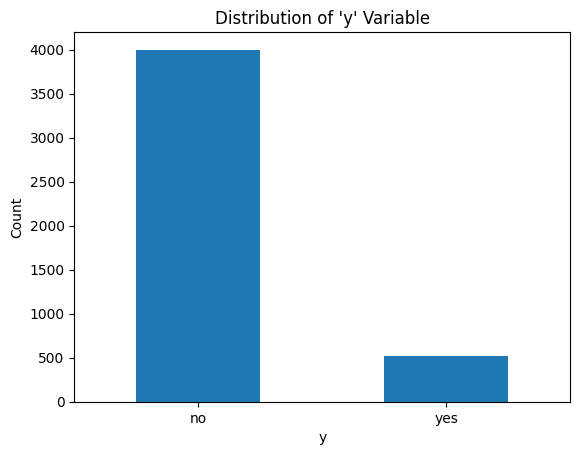

In [127]:
df['y'].value_counts().plot(kind='bar')
plt.title("Distribution of 'y' Variable")
plt.xlabel("y")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
# menampilkan distribusi value dari y

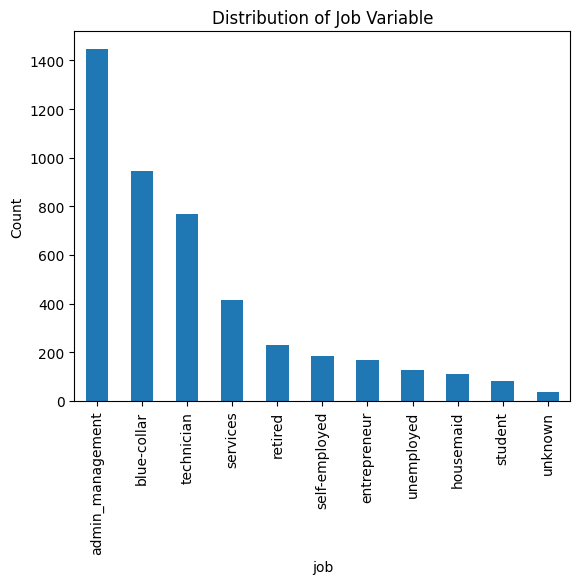

In [128]:
df['job'].value_counts().plot(kind='bar')
plt.title("Distribution of Job Variable")
plt.xlabel("job")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()
# menampilkan distribusi value pada kolom job

In [129]:
encoder = LabelEncoder()
df['job'] = encoder.fit_transform(df['job'])
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])
df['default'] = encoder.fit_transform(df['default'])
df['housing'] = encoder.fit_transform(df['housing'])
df['loan'] = encoder.fit_transform(df['loan'])
df['contact'] = encoder.fit_transform(df['contact'])
df['month'] = encoder.fit_transform(df['month'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])
df['y'] = encoder.fit_transform(df['y'])
# melakukan encode pada data yang bersifat categorical menjadi continuous

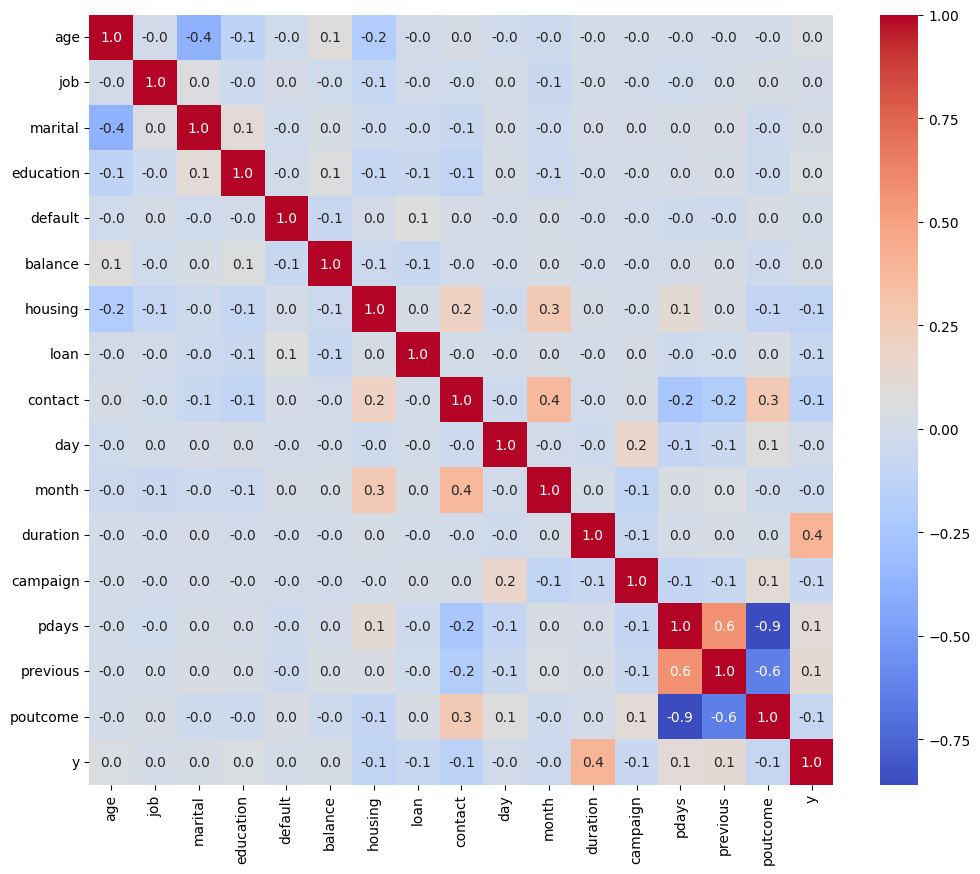

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt='0.1f')
plt.show()
# menampilkan heatmap dari tiap data dan dapat disimpulkan bahwa data yang paling berhubungan dengan y adalah duration, pdays, dan previous

## Machine Learning (Split Data)

In [131]:
X = df[['duration','pdays','previous']]
y = df['y']
# data x merupakan data yang paling berhubungan dengan y

In [132]:
from imblearn.combine import SMOTEENN

# Inisialisasi SMOTEEN
smote_enn = SMOTEENN(random_state=42)

# Terapkan SMOTE pada data training
X, y = smote_enn.fit_resample(X, y)

# Cek jumlah data setelah oversampling
print(y.value_counts())

y
0    2890
1    2172
Name: count, dtype: int64


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# melakukan train dan test, 80% data masuk ke training data, dan 20% masuk ke testing data

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [134]:
# a. Defining the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
# b. Predict the test set results
y_pred_rf = rf_clf.predict(X_test)
# Kode tersebut membuat, melatih, dan menerapkan model Random Forest untuk memprediksi target variabel 'y' menggunakan data uji, dengan tujuan klasifikasi.

In [135]:
# c. Check accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", accuracy_rf)
# menampilkan akurasi skor dari pemodelan random forest

Accuracy Random Forest: 0.9901283316880553


In [136]:
print("Training set score (Random Forest): ", rf_clf.score(X_train, y_train))
print("Test set score (Random Forest): ", rf_clf.score(X_test, y_test))
# membandingkan training score dengan test score untuk mengecek apakah data overfitting atau underfitting dan hasilnya adalah well-fitted

Training set score (Random Forest):  1.0
Test set score (Random Forest):  0.9901283316880553


In [137]:
# d. Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:")
print(conf_matrix_rf)
# menampilkan confusion matrix, Confusion matrix menunjukkan bahwa model Random Forest memiliki performa yang baik dengan sedikit kesalahan klasifikasi, dengan 590 + 413 prediksi benar dan 8 + 2 prediksi salah.

Confusion Matrix Random Forest:
[[590   8]
 [  2 413]]


In [138]:
# e. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest:")
print(class_report_rf)
# menampilkan classification report, Classification report menunjukkan bahwa model Random Forest memiliki performa yang sangat baik dengan akurasi 99%, presisi dan recall yang tinggi untuk kedua kelas target.

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       598
           1       0.98      1.00      0.99       415

    accuracy                           0.99      1013
   macro avg       0.99      0.99      0.99      1013
weighted avg       0.99      0.99      0.99      1013



In [139]:
# f. Result and Conclusion
# Model Random Forest, setelah penerapan SMOTEEN untuk mengatasi ketidakseimbangan kelas, menunjukkan kinerja yang sangat baik dengan akurasi 99%,
# presisi dan recall yang tinggi untuk kedua kelas. Hal ini ditunjukkan oleh Classification Report dan Confusion Matrix yang menunjukan sedikit
# kesalahan klasifikasi, mengindikasikan model yang efektif dalam memprediksi variabel target 'y'

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [140]:
# a. Defining the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
# b. Predict the test set results
y_pred_gbc = gbc.predict(X_test)
# Kode tersebut membuat, melatih, dan menggunakan model Gradient Boosting Classifier untuk memprediksi hasil pada data uji.

In [141]:
# c. Check accuracy score
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Accuracy Gradient Boosting Classifier:", accuracy_gbc)
# menampilkan akurasi skor dari pemodelan gradient boosting classifier

Accuracy Gradient Boosting Classifier: 0.9782823297137216


In [142]:
print("Training set score (Gradient Boosting Classifier): ", gbc.score(X_train, y_train))
print("Test set score (Gradient Boosting Classifier): ", gbc.score(X_test, y_test))
# membandingkan training score dengan test score untuk mengecek apakah data overfitting atau underfitting dan hasilnya adalah well-fitted

Training set score (Gradient Boosting Classifier):  0.9856754754260311
Test set score (Gradient Boosting Classifier):  0.9782823297137216


In [143]:
# d. Confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix Gradient Boosting Classifier:")
print(conf_matrix_gbc)
# Confusion matrix menunjukkan bahwa model Gradient Boosting Classifier memiliki performa yang baik, dengan 582 + 409 prediksi benar dan 16 + 6 prediksi salah.

Confusion Matrix Gradient Boosting Classifier:
[[582  16]
 [  6 409]]


In [144]:
# e. Classification report
class_report_gbc = classification_report(y_test, y_pred_gbc)
print("Classification Report Gradient Boosting Classifier:")
print(class_report_gbc)
# Classification Report menunjukkan bahwa Gradient Boosting Classifier memiliki performa yang sangat baik dalam memprediksi kedua kelas.

Classification Report Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       598
           1       0.96      0.99      0.97       415

    accuracy                           0.98      1013
   macro avg       0.98      0.98      0.98      1013
weighted avg       0.98      0.98      0.98      1013



In [145]:
# f. Results and conclusion
# Penerapan SMOTEENN berkontribusi pada performa model yang baik dengan mengatasi ketidakseimbangan kelas dalam dataset.
# Dengan menyeimbangkan data, model dapat mempelajari pola dari kedua kelas dengan lebih efektif, sehingga meningkatkan akurasi dan kemampuan generalisasi.
# Hasil dari Confusion Matrix dan Classification Report mendukung hal ini, menunjukkan sedikit kesalahan klasifikasi dan metrik performa yang tinggi.